In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\reha\OneDrive\Masaüstü\competitionsKaggle\test.csv")
test = df.copy()
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
test.count()

Id               1459
MSSubClass       1459
MSZoning         1455
LotFrontage      1232
LotArea          1459
                 ... 
MiscVal          1459
MoSold           1459
YrSold           1459
SaleType         1458
SaleCondition    1459
Length: 80, dtype: int64

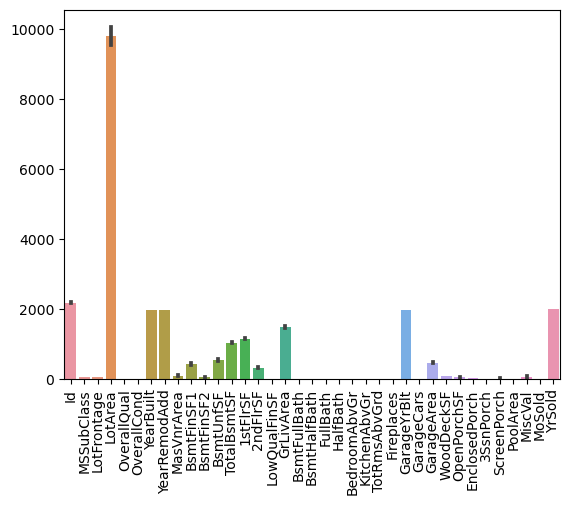

In [12]:
sns.barplot(data = test);
plt.xticks(rotation = 90);
#tablodaki columnların hangi degerler arasında yer aldıgı hakkında bilgi topladım . 

In [4]:
#iki dosyanın birleştrilme işlemi yapılacak simdi
df2 = pd.read_csv(r"C:\Users\reha\OneDrive\Masaüstü\competitionsKaggle\sample_submission.csv")
df2.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [10]:
all_df = pd.merge(df2 , test , on ="Id" , how = "inner")
all_df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,169277.052498,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,187758.393989,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,183583.683570,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,179317.477511,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,150730.079977,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [28]:
all_df["MSZoning"].info()

<class 'pandas.core.series.Series'>
Int64Index: 1459 entries, 0 to 1458
Series name: MSZoning
Non-Null Count  Dtype 
--------------  ----- 
1455 non-null   object
dtypes: object(1)
memory usage: 22.8+ KB


In [12]:
all_df.to_csv("alltable.csv" , index = False)

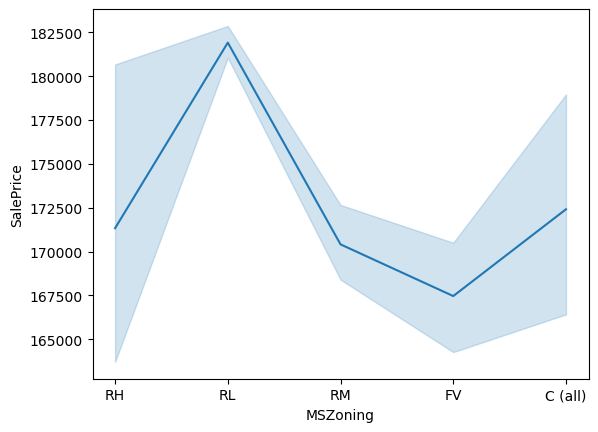

In [32]:
sns.lineplot(x = "MSZoning" , y = "SalePrice" , data = all_df);
#burda genel imar sınıflandırılmasında fiyatlarda nasıl bir etki oldugunu gosteren bir grafik.

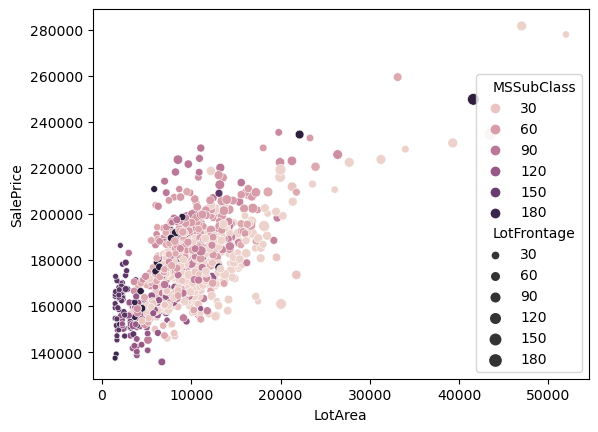

In [24]:
sns.scatterplot(x = "LotArea" , y = "SalePrice" ,size = "LotFrontage" , hue = "MSSubClass" ,  data = all_df);
#bu grafikte cesitli etkenlerin fiyatta nasıl bir etki yarrattıgı ile ilgili bir grafiktir.

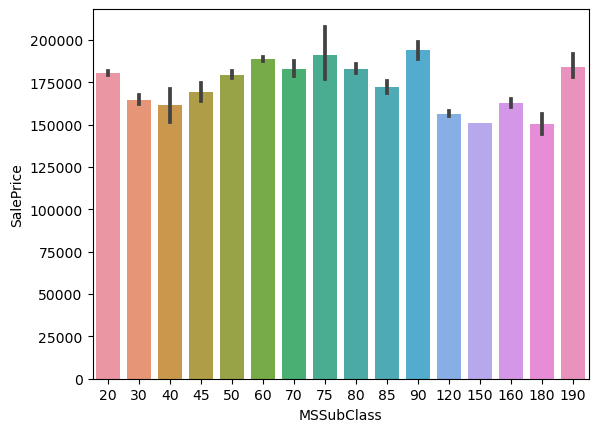

In [37]:
sns.barplot(x = "MSSubClass" , y = "SalePrice" , data = all_df);
#bu grafikte yapı sınıfının fiyatlar uzerinde nasıl bir etkisi olduguna baktık ve analiz edecek olursak cok az ve cok fazla oldugunda fiyatta artış gostertmiyor
#fakat ortalama bir yapı sınıfıysa fiyatta artıs oldugu ortaya cıkıyor.

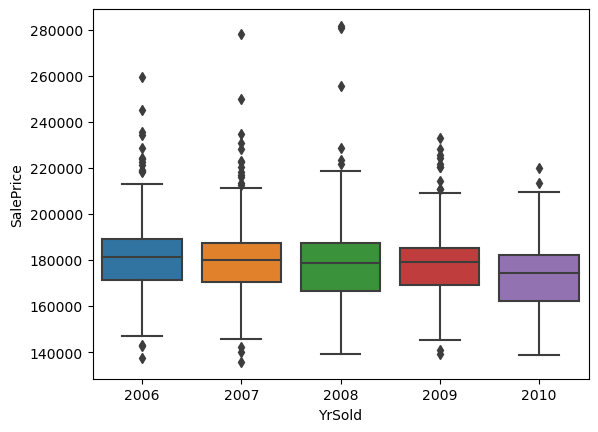

In [46]:
sns.boxplot(x = "YrSold" , y = "SalePrice" , data = all_df);
#ortalama yıllarda satıs fiyatları degişimini göz onıne alacak olursak 2010 yılına kadar yavas yavas bir düşme soz konusudur.

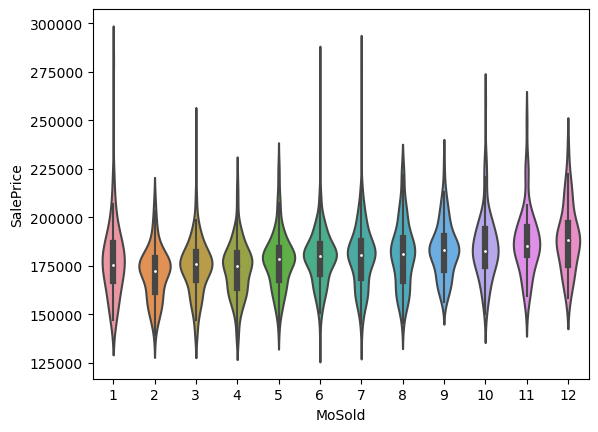

In [47]:
sns.violinplot(x = "MoSold" , y = "SalePrice" , data = all_df); 
#bu gafikte toplam satısların aylara göre dagılımı verilmiştir burda cıkracagımız sonuc soyledir . genelde fiyat olaarak her ay satıs yapılabilmketedir fkat satıs fiyatları ortalaması genel olarak 11 , 12 ve 1 nci 
#aylarda artmaktadır bunun muhtemel sebebi ise yazın insanlar tatile giirp geldikten sonra hayatlarını ordakilere göre biraz özzenme sebebi olarak yeni bir hayat baslatmak istemeleridir. Yani varacagımız sonuc insanlar 
#yaz ve bahar aylarında yeni şeyler görüp ogrenip diger aylarda ise imkanı olanlar hayatlarında degişikkik yapıyor.